# Effect Size, P-Values and Power - Lab

## Introduction 

In this lab, you'll run simulations to continue to investigate the relationship between effect size, p-values, power, and sample size!

## Objectives
You will be able to:
* Run a simulation that creates a visualization to demonstrate the interaction between power, sample size, and effect size

## Philosophical review

Remember that the underlying question behind all hypothesis tests is:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

This is exactly what a p-value represents: the chance that the observed data would satisfy the null hypothesis. As such, if the p-value is sufficiently low, you can declare the results statistically significant and reject the null hypothesis. Recall that this threshold is defined as $\alpha$, and is also the rate of type I errors. In this lab, you'll investigate the robustness of p-values and their relation with effect-size and sample-size. 

## Import starter functions

To start, import the functions stored in the `flatiron_stats.py` file. It contains the stats functions that you previously coded in the last lab: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. You'll then use these functions below to further investigate the relationship between p-values and sample size.

In [1]:
# Your code here; import the contents from flatiron_stats.py
# You may also wish to open up flatiron_stats.py in a text editor to preview its contents 
from flatiron_stats import welch_t 
from flatiron_stats import welch_df
from flatiron_stats import p_value_welch_ttest
import scipy.stats as stats

## Generate random samples

Before you start running simulations, it will be useful to have a helper function that will generate random samples. Write such a function below which generates 2 random samples from 2 normal distributions. The function should take 6 input parameters:

* m1 - The underlying population mean for sample 1
* s1 - The underlying population standard deviation for sample 1
* n1 - The sample size for sample 1

* m2 - The underlying population mean for sample 2
* s2 - The underlying population standard deviation for sample 2
* n2 - The sample size for sample 2

In [2]:
import numpy as np
def generate_samples(m1, s1, n1, m2, s2, n2):
    # Your code here; have the function create two random samples using the input parameters
    sample1 = stats.norm.rvs(loc=m1,scale=s1,size=n1)
    sample2 = stats.norm.rvs(loc=m2,scale=s2,size=n2)
    return sample1, sample2

## Run a simulation

For your first simulation, you're going to investigate how the p-value of an experiment relates to sample size when both samples are from identical underlying distributions. To do this, use your `generate_samples()` function along with the `p_value_welch_ttest()` function defined in the `flatiron_stats` file. Use sample sizes from 5 to 750. For each sample size, simulate 100 experiments. For each of these experiments, generate 2 samples of the given sample size. Each sample should have a standard deviation of 1. The first sample should have a mean of 5 and the second should have a mean of 5 plus the effect size, you hope to detect. Calculate the corresponding p-values for a Welch's t-test for each of these sample pairs. Finally, use the p-values to calculate the power of the test. Remember that for all of the simulations where the effect size does not equal zero, the null hypothesis is not true. Store the overall power from the 100 simulations along with the corresponding sample size and effect size. Use varying effect sizes such as [0, 0.01, 0.1, 0.2, 0.5, 1, 2]. You'll then plot power vs sample size for various effect sizes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()

In [4]:
power_analysis = TTestIndPower()
Effect_Size_List = [0, 0.01, 0.1, 0.2, 0.5, 1, 2]
alpha = 0.05
Sample_Size_list = [5, 50, 100, 250, 350, 500, 750]
samp1, samp2 = generate_samples(5,1,n1,5 + effect_size,1,20)
p_value_welch_ttest(samp1,samp2, two_sided=False)
power_analysis.solve_power(effect_size=Effect_Size, nobs1=n1, alpha=alpha)

NameError: name 'n1' is not defined

In [64]:
# Your code here

# Pseudo code outline
# for effect size:
#     for sample_size:
#         perform 100 simulations
#         calculate power
#         store effect_size, sample_size, power for simulations

# hardwired variables as per the question
alpha = 0.05
mean = 5

power_analysis = TTestIndPower() # instantiate an instance for TTestIndPower

# the varying list of Effect Sizes and Sample Sizes
Effect_Size_List = [0, 0.01, 0.1, 0.2, 0.5, 1, 2]
Sample_Size_List = [5, 50, 100, 250, 350, 500, 750]

# running repeated experiments
power_vs_effect = {} # this is what we want to put in a df at the end
    
for effect_size in Effect_Size_List: # for each listed effect size
    sample_vs_power = {}  #initialise a dict where the power is calculated for each sample size
    for sample_size in range(5,750,5):  #for each increment of sample size by 5
        p_vals = []  #store the p_values from the welch t test
        for i in range(100): #run the test for a certain effect size, for a certain sample size 100 times.
            samp1, samp2 = generate_samples(mean,1,sample_size,mean + effect_size,1,sample_size)
            p = p_value_welch_ttest(samp1, samp2)
            p_vals.append(p) # we now have a list of p-vals which we can then use to calculate power
        #how many of each 100 runs was the p value less than alph? This is the power
        # we then assign the power per sample size with the following line
        sample_vs_power[sample_size] = np.sum(1 for p in p_vals if p<alpha)/len(p_vals) 
    # for each effect size and each sample size,power has been calculated
    # we then assign the power per sample size for that particular effect.
    
    power_vs_effect[effect_size] = sample_vs_power
    # eventually, this should result in a dictionary where the keys are the 7 effect sizes
    # in turn, each key itself has a value which is a dictionary, where the keys of such dictionary are the sample sizes
    # generated from the 5 step loop up to 750 and the value of each such key is the power.
            
df = pd.DataFrame(power_vs_effect) # create a dataframe

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Now that you've simulated the data, go ahead and graph it! Label the x-axis sample size, the y-axis power, and be sure to include a legend for the various effect sizes.

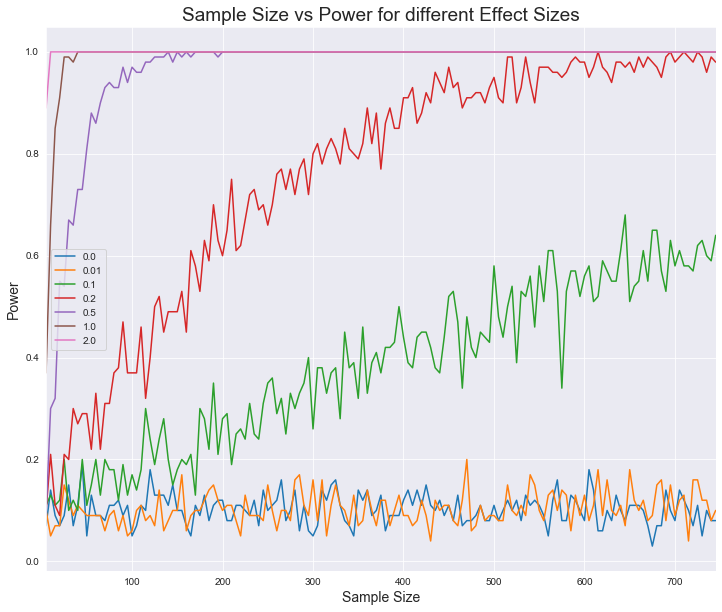

In [66]:
# Your code here

df.plot(figsize=(12,10))
plt.xlabel('Sample Size', size = 14)
plt.ylabel('Power', size = 14)
plt.title('Sample Size vs Power for different Effect Sizes', size=19)
plt.legend()
plt.show()

As you can see, it's also typically incredibly difficult (if not impossible) to accurately detect effect sizes below 0.1!

## Summary

This lesson summarizes and further builds upon the ideas that we saw in the previous labs. We learned how p-value can be described as a function of effect size and for a given effect size, the p-value may get lower if we increase the sample size considerably. We also saw how p-value alone can not be used in order to identify some results as truly significant, as this can be achieved when there is not a significant effect size. 